In [108]:
import pandas as pd
from matplotlib import pyplot as plt
import math
import numpy as np

In [109]:
df = pd.read_csv('Only_my_station.csv')
del df['Unnamed: 0']

In [110]:
df['tripduration'] = list(x/3600 for x in df['tripduration'])

In [111]:
df['starttime'] = pd.to_datetime(df['starttime'], format="%d/%m/%Y %H:%M")
df['stoptime'] = pd.to_datetime(df['stoptime'], format="%d/%m/%Y %H:%M")

In [112]:
df['gender'] = df['gender'].replace({1, 2, 0}, {'Male', 'Female', "Unrecognised"})

<BarContainer object of 3 artists>

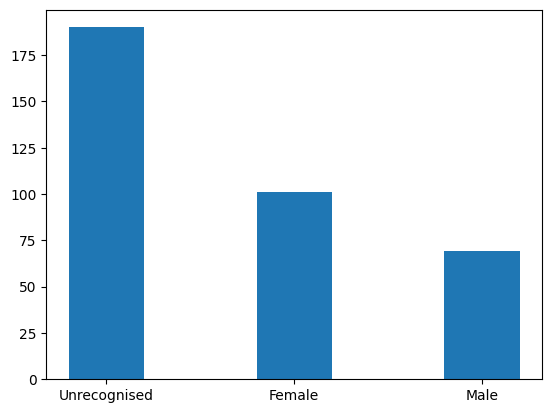

In [113]:
genders = ['Unrecognised', 'Female', 'Male']
genders_c = list(df.value_counts(df['gender']))
plt.bar(genders, genders_c, width=0.4)

<BarContainer object of 2 artists>

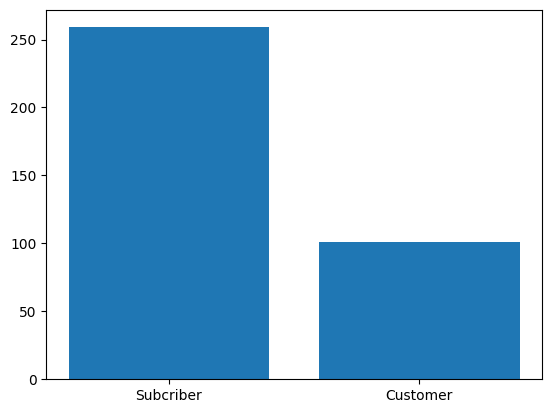

In [114]:
usertype = ['Subcriber', 'Customer']
usertype_c = list(df.value_counts(df['usertype']))
plt.bar(usertype, usertype_c)

In [115]:
mmin = round(min(df['tripduration']))
mmax = round(max(df['tripduration']))
N = df.shape[0]
k = round(math.sqrt(N))
intervals = round((mmax - mmin)/k)

(array([154., 113.,  66.,  12.,   6.,   1.,   3.,   0.,   1.,   0.,   0.,
          2.,   0.,   0.,   0.,   0.,   1.,   0.,   1.]),
 array([0.03888889, 0.20226608, 0.36564327, 0.52902047, 0.69239766,
        0.85577485, 1.01915205, 1.18252924, 1.34590643, 1.50928363,
        1.67266082, 1.83603801, 1.9994152 , 2.1627924 , 2.32616959,
        2.48954678, 2.65292398, 2.81630117, 2.97967836, 3.14305556]),
 <BarContainer object of 19 artists>)

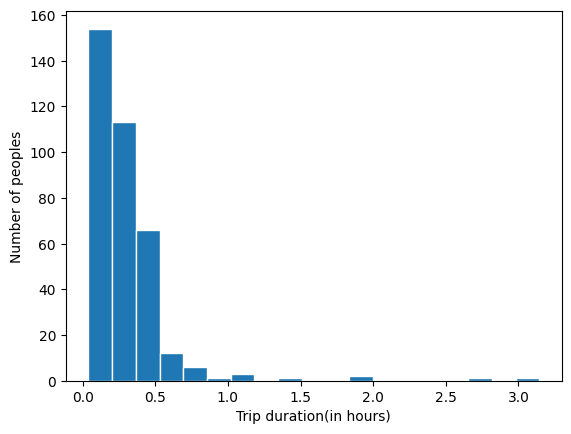

In [116]:
time = list(df['stoptime'][x] - df['starttime'][x] for x in range(df.shape[0]))
plt.ylabel('Number of peoples')
plt.xlabel('Trip duration(in hours)')
plt.hist(df['tripduration'], bins=k, edgecolor='w')

In [121]:
df['birth year'] = pd.to_numeric(df['birth year'], errors='coerce')
#df['birth year'] = df['birth year'].replace(np.nan, 'Unrecognised')
ages = []
for i in range(df.shape[0]):
    if type(df['birth year'][i]) is not str:
        ages.append(2023 - df['birth year'][i])
    else:
        ages.append(df['birth year'][i])

In [122]:
mmin = round(min(ages))
mmax = round(max(ages))
N = df.shape[0]
k = round(math.sqrt(N))
intervals = round((mmax - mmin)/k)

(array([ 1.,  5., 19., 34., 25., 25., 19., 35., 16., 14., 23., 18.,  5.,
        11.,  4.,  1.,  3.,  0.,  1.]),
 array([27.        , 29.78947368, 32.57894737, 35.36842105, 38.15789474,
        40.94736842, 43.73684211, 46.52631579, 49.31578947, 52.10526316,
        54.89473684, 57.68421053, 60.47368421, 63.26315789, 66.05263158,
        68.84210526, 71.63157895, 74.42105263, 77.21052632, 80.        ]),
 <BarContainer object of 19 artists>)

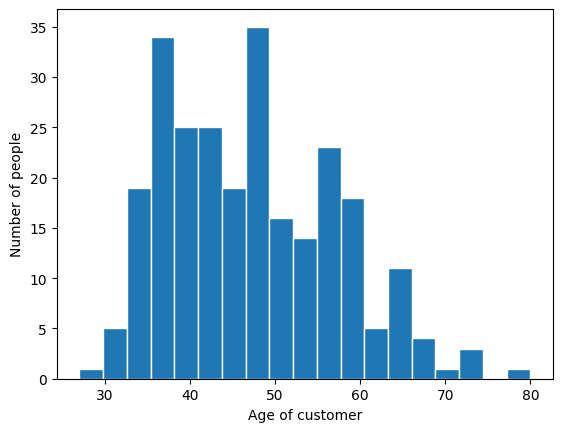

In [126]:
plt.ylabel('Number of people')
plt.xlabel('Age of customer')
plt.hist(ages, bins=k, edgecolor='w')